In [469]:
import sys
sys.path.insert(0, '/home/jovyan/work/Molecular_Properties/model-pipeline/src')
import pandas as pd
import warnings
import numpy as np

from bearinmind_pipeline.data_preprocessing import dataPreprocessing as dp
#from bearinmind_pipeline.model_construction import modelBuilder as mb
import bearinmind_pipeline.model_construction as mc

from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [470]:
df_train_txn = pd.read_csv('train_transaction.csv')
df_test_txn = pd.read_csv('test_transaction.csv')

In [471]:
df_train_txn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,nan,150.000,discover,142.000,credit,315.000,87.000,19.000,nan,NaN,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,2.000,0.000,1.000,1.000,14.000,nan,13.000,nan,nan,nan,nan,nan,nan,13.000,13.000,nan,nan,nan,0.000,T,T,T,M2,F,T,NaN,NaN,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,117.000,0.000,0.000,0.000,0.000,0.000,117.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,117.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.000,W,2755,404.000,150.000,mastercard,102.000,credit,325.000,87.000,nan,nan,gmail.com,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000

In [472]:
df_test_txn['card6'].value_counts()

debit          385021
credit         118662
charge card         1
Name: card6, dtype: int64

In [473]:
df_train_txn[df_train_txn['card6'] == 'credit']['isFraud'].value_counts()

0    139036
1      9950
Name: isFraud, dtype: int64

In [474]:
df_train_txn['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [475]:
df_train_txn.groupby('ProductCD')['isFraud'].value_counts()

ProductCD  isFraud
C          0           60511
           1            8008
H          0           31450
           1            1574
R          0           36273
           1            1426
S          0           10942
           1             686
W          0          430701
           1            8969
Name: isFraud, dtype: int64

In [476]:
df_train_txn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,nan,150.000,discover,142.000,credit,315.000,87.000,19.000,nan,NaN,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,2.000,0.000,1.000,1.000,14.000,nan,13.000,nan,nan,nan,nan,nan,nan,13.000,13.000,nan,nan,nan,0.000,T,T,T,M2,F,T,NaN,NaN,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,117.000,0.000,0.000,0.000,0.000,0.000,117.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,117.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,0,86401,29.000,W,2755,404.000,150.000,mastercard,102.000,credit,325.000,87.000,nan,nan,gmail.com,NaN,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000

In [477]:
df_train_txn = df_train_txn.iloc[:,1:15]

In [478]:
#df_train_txn = df_train_txn.drop(['TransactionDT'], axis = 1)

In [479]:
df_train_txn.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2
0,0,86400,68.500,W,13926,nan,150.000,discover,142.000,credit,315.000,87.000,19.000,nan
1,0,86401,29.000,W,2755,404.000,150.000,mastercard,102.000,credit,325.000,87.000,nan,nan
2,0,86469,59.000,W,4663,490.000,150.000,visa,166.000,debit,330.000,87.000,287.000,nan
3,0,86499,50.000,W,18132,567.000,150.000,mastercard,117.000,debit,476.000,87.000,nan,nan
4,0,86506,50.000,H,4497,514.000,150.000,mastercard,102.000,credit,420.000,87.000,nan,nan


In [480]:
df_test_txn = df_test_txn.iloc[:,1:14]

In [481]:
df_test_txn.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2
0,18403224,31.950,W,10409,111.000,150.000,visa,226.000,debit,170.000,87.000,1.000,nan
1,18403263,49.000,W,4272,111.000,150.000,visa,226.000,debit,299.000,87.000,4.000,nan
2,18403310,171.000,W,4476,574.000,150.000,visa,226.000,debit,472.000,87.000,2635.000,nan
3,18403310,284.950,W,10989,360.000,150.000,visa,166.000,debit,205.000,87.000,17.000,nan
4,18403317,67.950,W,18018,452.000,150.000,mastercard,117.000,debit,264.000,87.000,6.000,nan


In [482]:
df_train_txn['TransactionDT'].describe()

count     590540.000
mean     7372311.310
std      4617223.647
min        86400.000
25%      3027057.750
50%      7306527.500
75%     11246620.000
max     15811131.000
Name: TransactionDT, dtype: float64

In [483]:
# Calculate Seconds from the most recent transaction
df_train_txn['Seconds_Most_Recent'] = df_train_txn['TransactionDT'] - df_train_txn['TransactionDT'].min()
df_train_txn['Minute_Most_Recent'] = round(df_train_txn['Seconds_Most_Recent'] / 60, 0)
df_train_txn['Hour_Most_Recent'] = round(df_train_txn['Minute_Most_Recent'] / 60, 0)
df_train_txn['Day_Most_Recent'] = round(df_train_txn['Hour_Most_Recent'] / 24, 0)
df_train_txn['Week_Most_Recent'] = round(df_train_txn['Day_Most_Recent'] / 7, 0)
df_train_txn['Months_Most_Recent'] = round(df_train_txn['Day_Most_Recent'] / 30, 0)

In [484]:
df_test_txn['Seconds_Most_Recent'] = df_test_txn['TransactionDT'] - df_test_txn['TransactionDT'].min()
df_test_txn['Minute_Most_Recent'] = round(df_test_txn['Seconds_Most_Recent'] / 60, 0)
df_test_txn['Hour_Most_Recent'] = round(df_test_txn['Minute_Most_Recent'] / 60, 0)
df_test_txn['Day_Most_Recent'] = round(df_test_txn['Hour_Most_Recent'] / 24, 0)
df_test_txn['Week_Most_Recent'] = round(df_test_txn['Day_Most_Recent'] / 7, 0)
df_test_txn['Months_Most_Recent'] = round(df_test_txn['Day_Most_Recent'] / 30, 0)

In [485]:
#df_test_txn['Seconds_Most_Recent'].describe()

In [486]:
# Prepare time statistics

#week_mean_train[df_train_txn['Week_Most_Recent']]
def find_time_before(dct, period, x):
        try:
            y = dct[x+period]
        except:
            y = np.nan
        return(y)

def prep_period_before(df, n_before, date_agg = "Week"):
    _mean = dict(df.groupby(f'{date_agg}_Most_Recent')['TransactionAmt'].mean())
    _min = dict(df.groupby(f'{date_agg}_Most_Recent')['TransactionAmt'].min())
    _max = dict(df.groupby(f'{date_agg}_Most_Recent')['TransactionAmt'].max())
    _std = dict(df.groupby(f'{date_agg}_Most_Recent')['TransactionAmt'].std())
    
    for n in n_before:
        df[f'{n}_{date_agg}_Before_Mean'] = df['TransactionAmt']/df[f'{date_agg}_Most_Recent'].apply(lambda x: find_time_before(_mean, n, x))
        df[f'{n}_{date_agg}_Before_Min'] = df['TransactionAmt']/df[f'{date_agg}_Most_Recent'].apply(lambda x: find_time_before(_min, n, x))
        df[f'{n}_{date_agg}_Before_Max'] = df['TransactionAmt']/df[f'{date_agg}_Most_Recent'].apply(lambda x: find_time_before(_max, n, x))
        df[f'{n}_{date_agg}_Before_Std'] = df['TransactionAmt']/df[f'{date_agg}_Most_Recent'].apply(lambda x: find_time_before(_std, n, x))
        
        print(f'{n} {date_agg} is finished ...')
    
    return df

In [487]:
df_train_txn = prep_period_before(df_train_txn, [0,1,2,3,4], "Week")
df_train_txn = prep_period_before(df_train_txn, [0,1,2,3,4,5,6,7,8,9,10], "Hour")
df_train_txn = prep_period_before(df_train_txn, [0,1,2], "Months")
df_train_txn = prep_period_before(df_train_txn, [0,1,2,3,4,5,6,7], "Day")

0 Week is finished ...
1 Week is finished ...
2 Week is finished ...
3 Week is finished ...
4 Week is finished ...
0 Hour is finished ...
1 Hour is finished ...
2 Hour is finished ...
3 Hour is finished ...
4 Hour is finished ...
5 Hour is finished ...
6 Hour is finished ...
7 Hour is finished ...
8 Hour is finished ...
9 Hour is finished ...
10 Hour is finished ...
0 Months is finished ...
1 Months is finished ...
2 Months is finished ...
0 Day is finished ...
1 Day is finished ...
2 Day is finished ...
3 Day is finished ...
4 Day is finished ...
5 Day is finished ...
6 Day is finished ...
7 Day is finished ...


In [488]:
df_test_txn = prep_period_before(df_test_txn, [0,1,2,3,4], "Week")
df_test_txn = prep_period_before(df_test_txn, [0,1,2,3,4,5,6,7,8,9,10], "Hour")
df_test_txn = prep_period_before(df_test_txn, [0,1,2], "Months")
df_test_txn = prep_period_before(df_test_txn, [0,1,2,3,4,5,6,7], "Day")

0 Week is finished ...
1 Week is finished ...
2 Week is finished ...
3 Week is finished ...
4 Week is finished ...
0 Hour is finished ...
1 Hour is finished ...
2 Hour is finished ...
3 Hour is finished ...
4 Hour is finished ...
5 Hour is finished ...
6 Hour is finished ...
7 Hour is finished ...
8 Hour is finished ...
9 Hour is finished ...
10 Hour is finished ...
0 Months is finished ...
1 Months is finished ...
2 Months is finished ...
0 Day is finished ...
1 Day is finished ...
2 Day is finished ...
3 Day is finished ...
4 Day is finished ...
5 Day is finished ...
6 Day is finished ...
7 Day is finished ...


In [489]:
df_train_txn.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,Seconds_Most_Recent,Minute_Most_Recent,Hour_Most_Recent,Day_Most_Recent,Week_Most_Recent,Months_Most_Recent,0_Week_Before_Mean,0_Week_Before_Min,0_Week_Before_Max,0_Week_Before_Std,1_Week_Before_Mean,1_Week_Before_Min,1_Week_Before_Max,1_Week_Before_Std,2_Week_Before_Mean,2_Week_Before_Min,2_Week_Before_Max,2_Week_Before_Std,3_Week_Before_Mean,3_Week_Before_Min,3_Week_Before_Max,3_Week_Before_Std,4_Week_Before_Mean,4_Week_Before_Min,4_Week_Before_Max,4_Week_Before_Std,0_Hour_Before_Mean,0_Hour_Before_Min,0_Hour_Before_Max,0_Hour_Before_Std,1_Hour_Before_Mean,1_Hour_Before_Min,1_Hour_Before_Max,1_Hour_Before_Std,2_Hour_Before_Mean,2_Hour_Before_Min,2_Hour_Before_Max,2_Hour_Before_Std,3_Hour_Before_Mean,3_Hour_Before_Min,3_Hour_Before_Max,3_Hour_Before_Std,4_Hour_Before_Mean,4_Hour_Before_Min,4_Hour_Before_Max,4_Hour_Before_Std,5_Hour_Before_Mean,5_Hour_Before_Min,5_Hour_Before_Max,5_Hour_Before_Std,6_Hour_Before_Mean,6_Hour_Before_Min,6_Hour_Before_Max,6_Hour_Before_Std,7_Hour_Before_Mean,7_Hour_Before_Min,7_Hour_Before_Max,7_Hour_Before_Std,8_Hour_Before_Mean,8_Hour_Before_Min,8_Hour_Before_Max,8_Hour_Before_Std,9_Hour_Before_Mean,9_Hour_Before_Min,9_Hour_Before_Max,9_Hour_Before_Std,10_Hour_Before_Mean,10_Hour_Before_Min,10_Hour_Before_Max,10_Hour_Before_Std,0_Months_Before_Mean,0_Months_Before_Min,0_Months_Before_Max,0_Months_Before_Std,1_Months_Before_Mean,1_Months_Before_Min,1_Months_Before_Max,1_Months_Before_Std,2_Months_Before_Mean,2_Months_Before_Min,2_Months_Before_Max,2_Months_Before_Std,0_Day_Before_Mean,0_Day_Before_Min,0_Day_Before_Max,0_Day_Before_Std,1_Day_Before_Mean,1_Day_Before_Min,1_Day_Before_Max,1_Day_Before_Std,2_Day_Before_Mean,2_Day_Before_Min,2_Day_Before_Max,2_Day_Before_Std,3_Day_Before_Mean,3_Day_Before_Min,3_Day_Before_Max,3_Day_Before_Std,4_Day_Before_Mean,4_Day_Before_Min,4_Day_Before_Max,4_Day_Before_Std,5_Day_Before_Mean,5_Day_Before_Min,5_Day_Before_Max,5_Day_Before_Std,6_Day_Before_Mean,6_Day_Before_Min,6_Day_Before_Max,6_Day_Before_Std,7_Day_Before_Mean,7_Day_Before_Min,7_Day_Before_Max,7_Day_Before_Std
0,0,86400,68.500,W,13926,nan,150.000,discover,142.000,credit,315.000,87.000,19.000,nan,0,0.000,0.000,0.000,0.000,0.000,0.548,36.129,0.017,0.333,0.537,234.589,0.017,0.321,0.538,161.557,0.014,0.343,0.526,68.500,0.016,0.372,0.540,30.926,0.013,0.325,0.482,22.233,0.028,0.260,0.352,15.452,0.023,0.157,0.358,11.417,0.022,0.148,0.619,36.129,0.030,0.323,0.610,8.098,0.058,0.389,0.357,5.708,0.029,0.199,0.489,9.945,0.083,0.442,0.417,4.845,0.046,0.316,0.397,3.425,0.060,0.322,0.279,2.283,0.032,0.178,0.464,2.740,0.048,0.316,0.529,234.589,0.014,0.321,0.528,117.496,0.013,0.337,0.506,234.589,0.011,0.285,0.431,36.129,0.022,0.221,0.502,26.990,0.021,0.311,0.588,29.450,0.026,0.426,0.659,31.165,0.017,0.407,0.508,32.054,0.025,0.314,0.512,141.529,0.017,0.279,0.508,146.681,0.023,0.307,0.500,14.917,0.022,0.294
1,0,86401,29.000,W,2755,404.000,150.000,mastercard,102.000,credit,325.000,87.000,nan,nan,1,0.000,0.000,0.000,0.000,0.000,0.232,15.295,0.007,0.141,0.227,99.315,0.007,0.136,0.228,68.396,0.006,0.145,0.223,29.000,0.007,0.157,0.228,13.093,0.006,0.138,0.204,9.413,0.012,0.110,0.149,6.542,0.010,0.067,0.151,4.833,0.009,0.063,0.262,15.295,0.013,0.137,0.258,3.428,0.024,0.165,0.151,2.417,0.012,0.084,0.207,4.210,0.035,0.187,0.177,2.051,0.020,0.134,0.168,1.450,0.026,0.136,0.118,0.967,0.013,0.075,0.197,1.160,0.020,0.134,0.224,99.315,0.006,0.136,0.224,49.743,0.005,0.143,0.214,99.315,0.005,0.121,0.182,15.295,0.009,0.094,0.213,11.426,0.009,0.132,0.249,12.468,0.011,0.180,0.279,13.194,0.007,0.172,0.215,13.570,0.011,0.133,0.217,59.917,0.007,0.118,0.215,62.099,0.010,0.130,0.212,6.315,0.009,0.124
2,0,86469,59.000,W,4663,490.000,150.000,visa,166.000,debit,330.000,87.000,287.000,nan,69,1.000,0.000,0.000,0.000,0.000,0.472,31.118,0.015,0.287,0.462,202.055,0.014,0.277,0.464,139.151,0.012,0.296,0.453,59.000,0.014,0.320,0.465,26.637,0.01

In [490]:
encode_cols = ['card1','card2','card3','card4', 'card5', 'addr1', 'addr2', 'card6']

In [491]:
df_train_txn[encode_cols] = df_train_txn[encode_cols].where(df_train_txn[encode_cols].notnull(), 'NaN')
df_test_txn[encode_cols] = df_test_txn[encode_cols].where(df_test_txn[encode_cols].notnull(), 'NaN')

In [492]:
data = dp.encode_categorical(df_train_txn, df_test_txn, encode_cols)
df_train_txn = data['df_train']
df_test_txn = data['df_test']

colums card1 is being encoded
colums card2 is being encoded
colums card3 is being encoded
colums card4 is being encoded
colums card5 is being encoded
colums addr1 is being encoded
colums addr2 is being encoded
colums card6 is being encoded


In [493]:
df_train_txn.shape

(590540, 128)

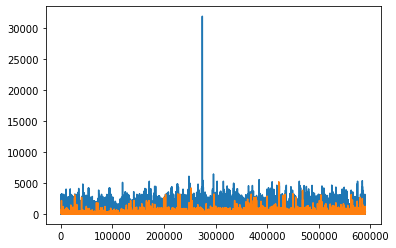

In [494]:
for i in df_train_txn['isFraud'].unique():
    plt.plot(df_train_txn[df_train_txn['isFraud'] == i]['TransactionAmt'])

In [495]:
df_train_txn['isFraud'].unique()

array([0, 1])

In [496]:
df_train_txn['TransactionAmt'].describe()

count   590540.000
mean       135.027
std        239.163
min          0.251
25%         43.321
50%         68.769
75%        125.000
max      31937.391
Name: TransactionAmt, dtype: float64

In [497]:
df_train_txn = df_train_txn[df_train_txn['TransactionAmt'] < 10500]

In [498]:
df_train_txn.shape

(590538, 128)

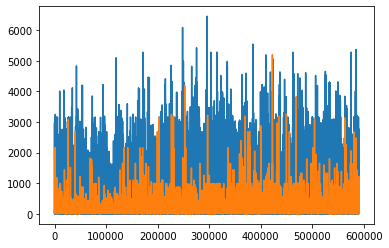

In [499]:
for i in df_train_txn['isFraud'].unique():
    plt.plot(df_train_txn[df_train_txn['isFraud'] == i]['TransactionAmt'])

In [500]:
df_train_txn['dist1'].describe(include = 'all')

count   238267.000
mean       118.503
std        371.873
min          0.000
25%          3.000
50%          8.000
75%         24.000
max      10286.000
Name: dist1, dtype: float64

In [501]:
#df_train_txn = df_train_txn[df_train_txn['dist1'] < 8100]

In [502]:
df_test_txn['dist1'].describe()

count   215474.000
mean        87.065
std        314.132
min          0.000
25%          3.000
50%          8.000
75%         20.000
max       8081.000
Name: dist1, dtype: float64

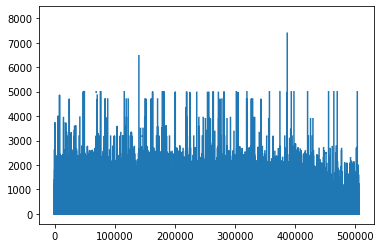

In [503]:
plt.plot(df_test_txn['dist1'])

In [504]:
#Initiate ModelBuilder Class
mb = mc.modelBuilder('classification', 'LGBM', ".")

In [505]:
#prep_data = mb.prepare_data_split(df_train =  df_train_txn, df_test = df_test_txn, target = 'isFraud', rem_cols = [], useVarImp = False, varimp_threshold = 100)

In [506]:
rem_cols = ['TransactionDT','ProductCD']

In [507]:
# LGBM
params = {
    'boosting_type':'gbdt',
    'n_estimators':1000,
    'num_leaves':128, 
    'objective':'binary', 
    'colsample_bytree': 1.0, 
    'learning_rate': 0.2,
    'max_bin':255, 
    'max_depth':9, 
    'metric':'auc', 
    'min_child_samples':10,
    'min_child_weight':5, 
    'min_split_gain':0.0,
    'random_state':0, 
    'reg_alpha':0.0,
    'reg_lambda':0.0, 
    'silent':True, 
    'subsample':1.0
}

# XGBoost
params_xgb = {
    'n_estimators':500,
    'max_depth':9,
    'learning_rate':0.05,
    'subsample':0.9,
    'colsample_bytree':0.9,
    'tree_method' : 'hist',
    'nthread': 42
    #'categorical_feature': encode_cols
}

In [508]:
df_train_txn.shape

(590538, 128)

125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.8841517547899984
Fold: 1
The valuation metric for the fold 1 is 0.8862454293185097
Fold: 2
The valuation metric for the fold 2 is 0.8871291003192772
The average score accross the folds is 0.8858420948092617
Displaying variable importance ...


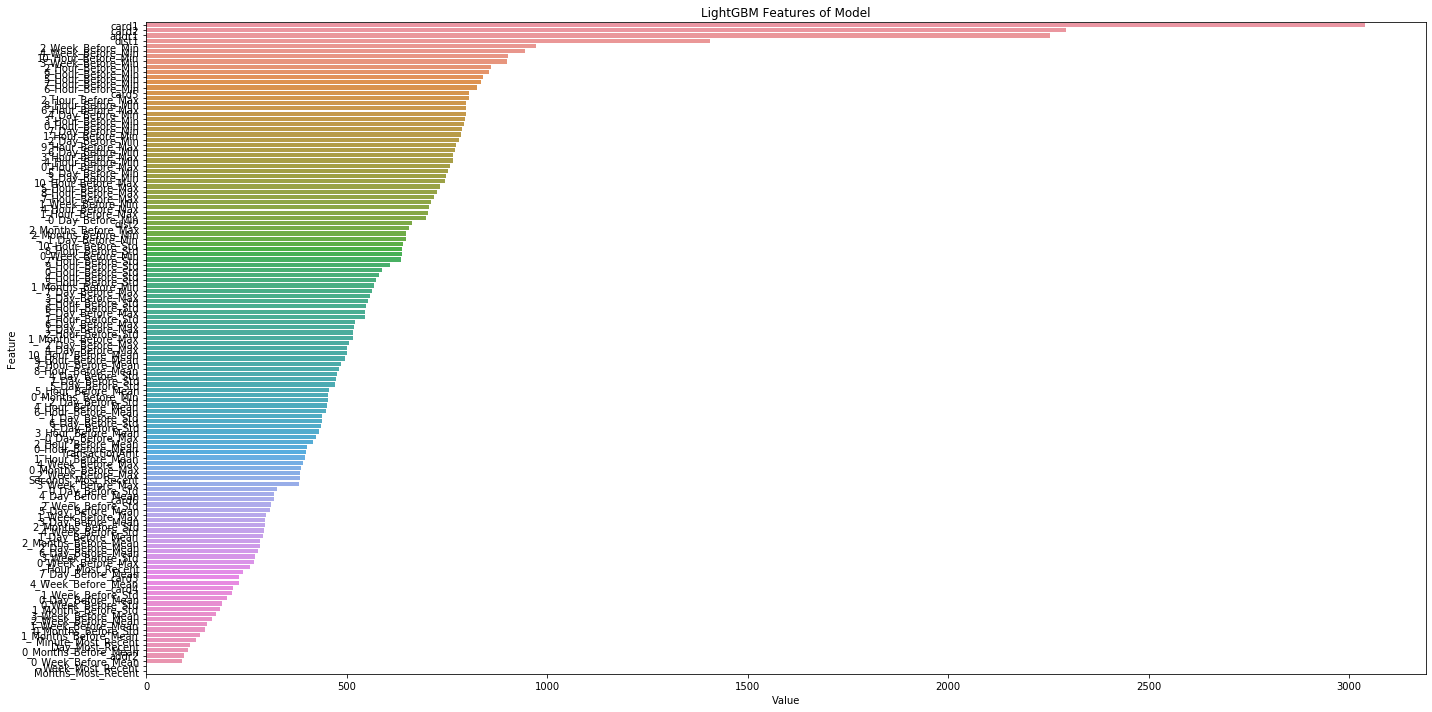

<Figure size 432x288 with 0 Axes>

In [509]:
prep_data = mb.prepare_data_split(df_train =  df_train_txn, df_test = df_test_txn, target = 'isFraud', rem_cols = rem_cols, useVarImp = False, varimp_threshold = 100)
submit = mb.run_model(prep_data, 3, metric_func = roc_auc_score, cross_val_fun = StratifiedKFold, get_probab = True, save_varimp = True, params = params, oversmp = False)

ProdCD type : W is being trained
125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.8486277915805593
Fold: 1
The valuation metric for the fold 1 is 0.8517457110260359
Fold: 2
The valuation metric for the fold 2 is 0.8473929061887188
The average score accross the folds is 0.8492554695984381
Displaying variable importance ...


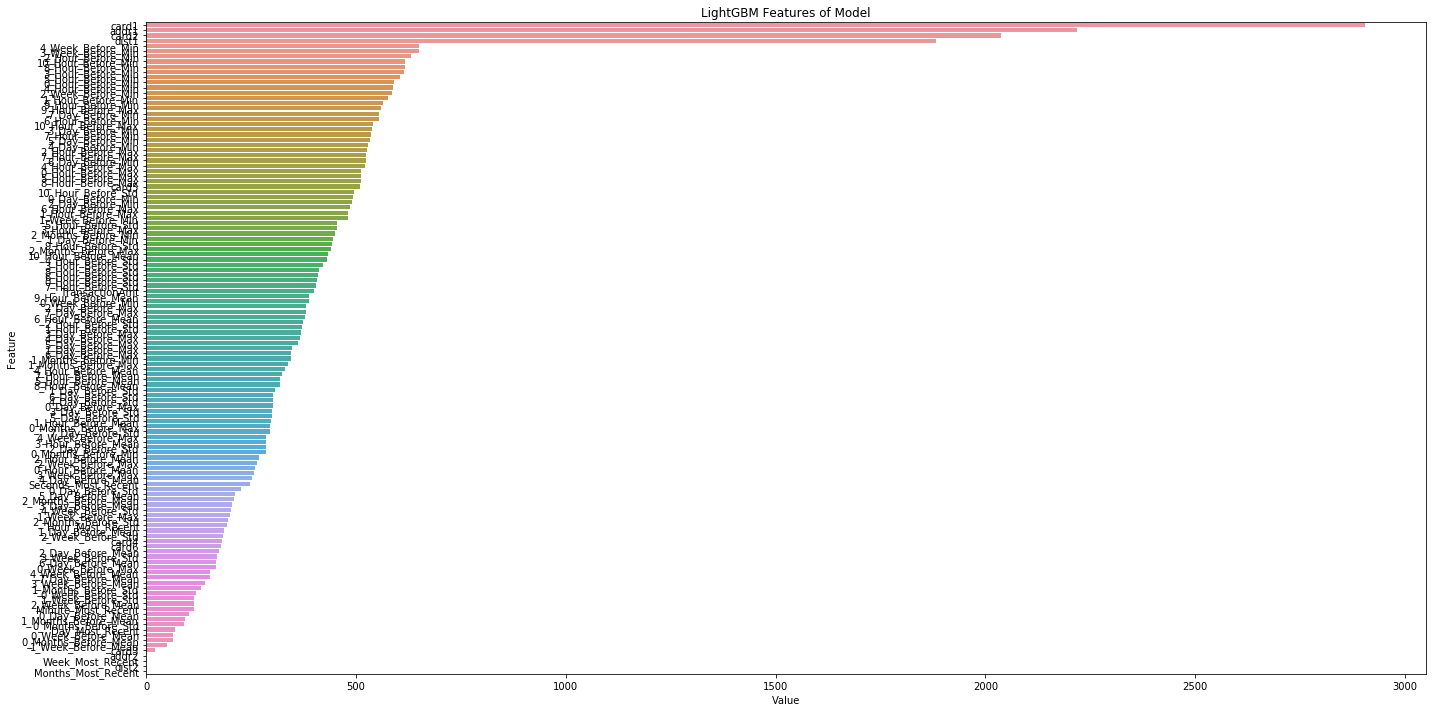

ProdCD type : H is being trained
125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.9282848240402609
Fold: 1
The valuation metric for the fold 1 is 0.9210296943350459
Fold: 2
The valuation metric for the fold 2 is 0.931301077790068
The average score accross the folds is 0.9268718653884583
Displaying variable importance ...


<Figure size 432x288 with 0 Axes>

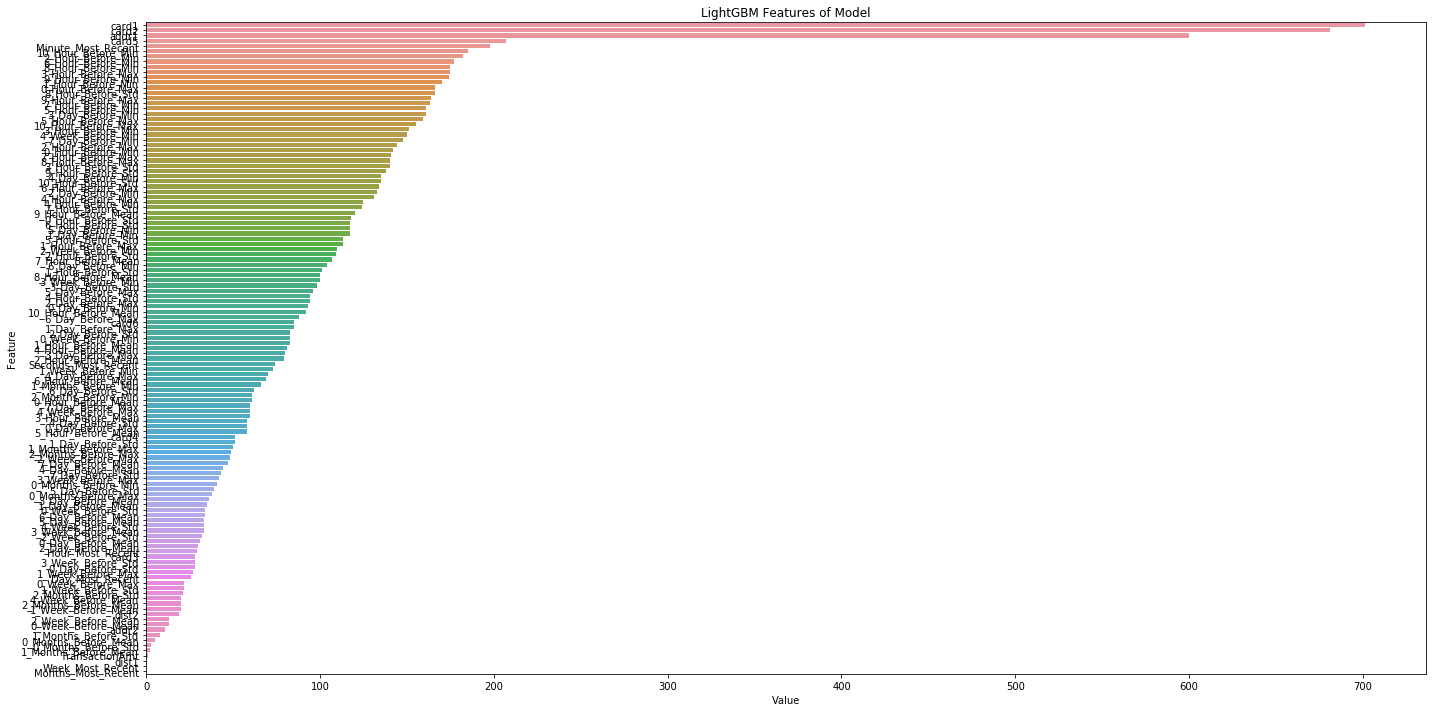

ProdCD type : C is being trained
125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.9212039589598819
Fold: 1
The valuation metric for the fold 1 is 0.9234324465349141
Fold: 2
The valuation metric for the fold 2 is 0.9161139308013768
The average score accross the folds is 0.9202501120987243
Displaying variable importance ...


<Figure size 432x288 with 0 Axes>

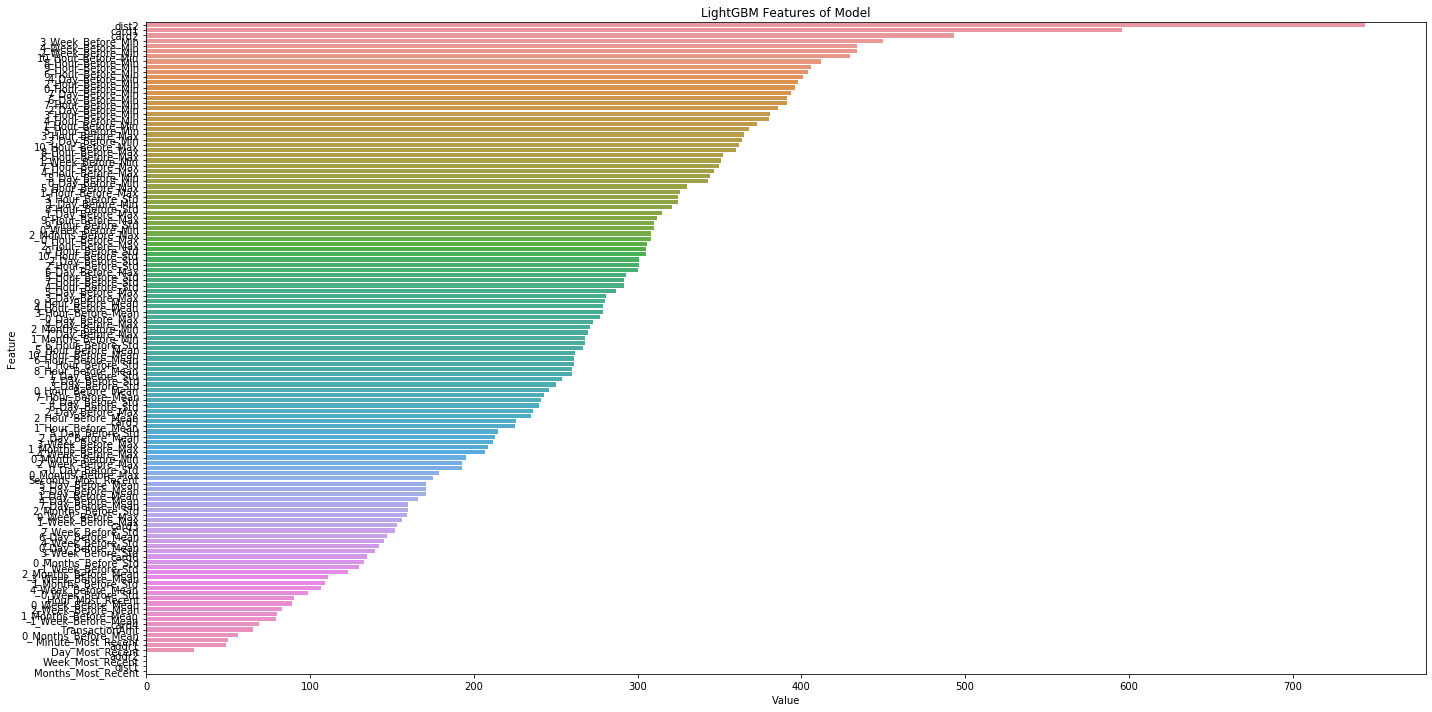

ProdCD type : S is being trained
125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.9394074877422813
Fold: 1
The valuation metric for the fold 1 is 0.95209318420476
Fold: 2
The valuation metric for the fold 2 is 0.949678659220027
The average score accross the folds is 0.9470597770556894
Displaying variable importance ...


<Figure size 432x288 with 0 Axes>

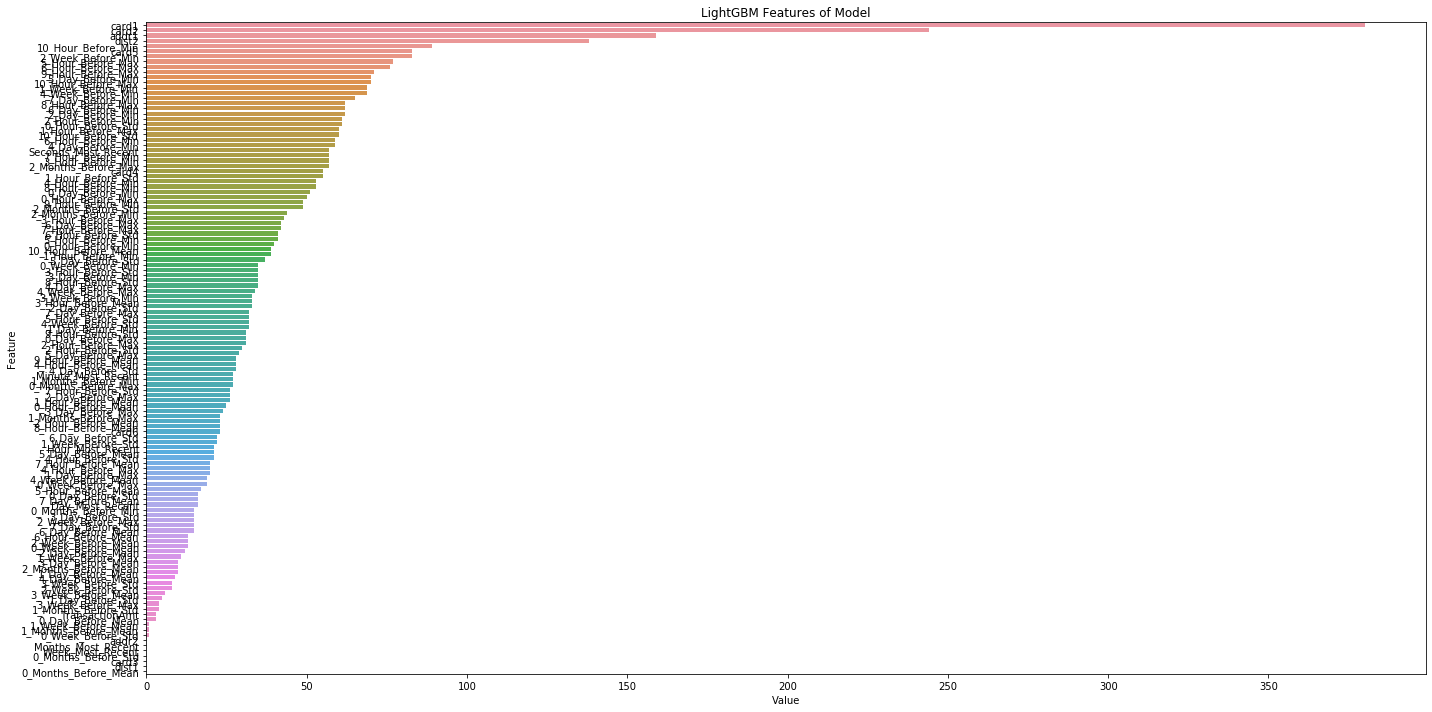

ProdCD type : R is being trained
125 features have been chosen for modeling
Fold: 0
The valuation metric for the fold 0 is 0.9281657167043478
Fold: 1
The valuation metric for the fold 1 is 0.9291591396819731
Fold: 2
The valuation metric for the fold 2 is 0.9428068724453595
The average score accross the folds is 0.9333772429438935
Displaying variable importance ...


<Figure size 432x288 with 0 Axes>

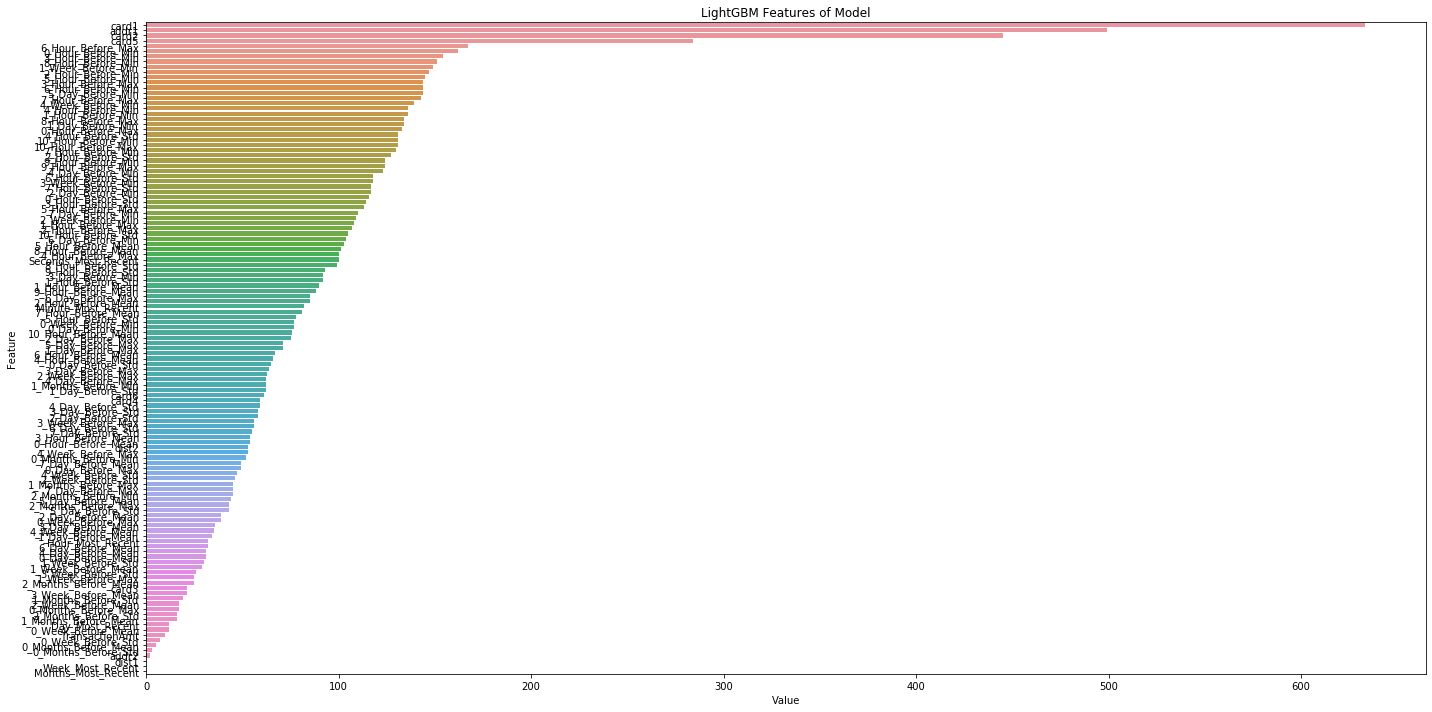

Overall mean is  0.9153628934170408


<Figure size 432x288 with 0 Axes>

In [510]:
dict_score = dict()
submission_list = list()
for j in df_train_txn['ProductCD'].unique():
    print(f'ProdCD type : {j} is being trained')
    
    df_train = df_train_txn[df_train_txn['ProductCD'] == j]
    df_test = df_test_txn[df_test_txn['ProductCD'] == j]
    
    prep_data = mb.prepare_data_split(df_train =  df_train, df_test = df_test, target = 'isFraud', rem_cols = rem_cols, useVarImp = False, varimp_threshold = 100)
    submit = mb.run_model(prep_data, 3, metric_func = roc_auc_score, cross_val_fun = StratifiedKFold, get_probab = True, save_varimp = True, params = params, oversmp = False)
    
    dict_score[j] = submit["AverageScore"]
    submission_list.append(submit["FinalPrediction"])
    
    
print("Overall mean is ", np.array(list(dict_score.values())).mean())